In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("top-5000-youtube-channels.csv")

### 1. Display All Rows Except the Last 5 rows Using Head Method

In [3]:
df.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4990,"4,991st",B+,Ho Ngoc Ha's Official Channel,208,--,127185704
4991,"4,992nd",B+,Toys to Learn Colors,11,663114,141933264
4992,"4,993rd",B+,КАZКА,25,131766,74304638
4993,"4,994th",B+,United CUBE (CUBE Entertainment…,1055,1586835,371299166


### 2. Display All Rows Except the First 5 Rows Using Tail Method

In [4]:
df.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
df.shape

(5000, 6)

### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


### 5. Get Overall Statistics About The Dataframe

In [7]:
df.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5.000000e+03
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.071449e+09
std,NaN,NaN,NaN,NaN,NaN,2.003844e+09
min,NaN,NaN,NaN,NaN,NaN,7.500000e+01
25%,NaN,NaN,NaN,NaN,NaN,1.862329e+08
50%,NaN,NaN,NaN,NaN,NaN,4.820548e+08
75%,NaN,NaN,NaN,NaN,NaN,1.124368e+09


### 6. Data Cleaning  (Replace '--'  to NaN)

In [8]:
df["Video Uploads"] = pd.to_numeric(df["Video Uploads"],errors="coerce")
df["Subscribers"] = pd.to_numeric(df["Subscribers"],errors="coerce")

### 7. Check Null Values In The Dataset

In [131]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

### 8. Data Cleaning [ Rank Column ]

In [9]:
# rem_ch = {"st":"","nd":"","rd":"","th":"",",":""}
df["Rank"] = df["Rank"].map(lambda x : x.replace("st","").replace("nd","").replace("rd","").replace("th","").replace(",",""))
df["Rank"] = df["Rank"].astype("int")

### 9. Data Cleaning [ Video Uploads & Subscribers ]

In [10]:
df["Video Uploads"] = df["Video Uploads"].fillna(df["Video Uploads"].mean())
df["Subscribers"] = df["Subscribers"].fillna(df["Subscribers"].mean())

### 10. Data Cleaning [ Grade Column ]

In [18]:
df["Grade"] = df["Grade"].map(lambda x : x.replace(" ","").replace("\xa0",df["Grade"].mode()[0][:-1]))

### 11. Find Average Views For Each Channel

In [94]:
df.groupby("Channel name")["Video views"].mean().to_frame()

,Video views
Channel name,
#Desenhos Kids BR,8.404115e+07
#FIRST WINGS FILM PRODUCTION,1.267895e+07
#Mentale Zuflucht,3.634114e+08
#Mind Warehouse,1.337877e+09
#Refugio Mental,1.262197e+09
...,...
핑크퐁 (인기 동요・동화),1.595353e+09
허팝Heopop,1.690027e+09
헤이지니 Hey Jini,4.550237e+08


### 12. Find Out Top Five Channels With Maximum Number of Video Uploads

<Axes: ylabel='Video Uploads'>

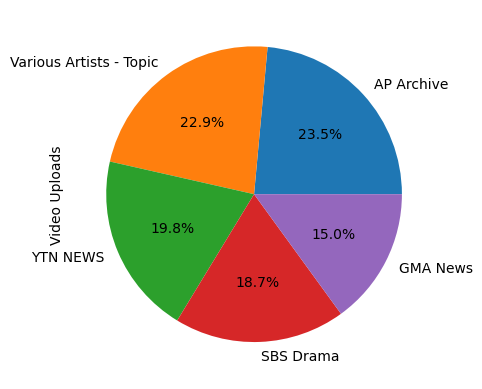

In [130]:
df.groupby("Channel name")["Video Uploads"].sum().sort_values(ascending=False)[:5].plot(kind="pie",autopct = "%0.1f%%")

### 13. Find Correlation Matrix

<Axes: >

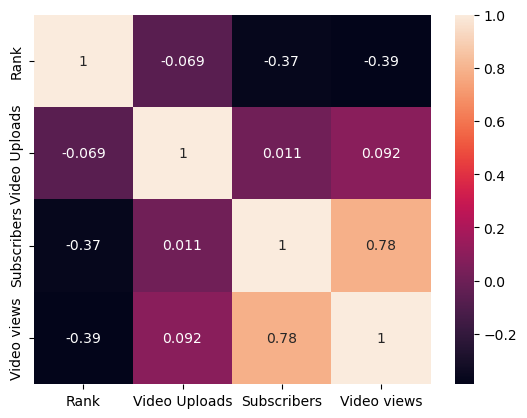

In [128]:
sns.heatmap(df.corr(),annot=True)

### 14. Which Grade Has A Maximum Number of Video Uploads?

<Axes: xlabel='Grade'>

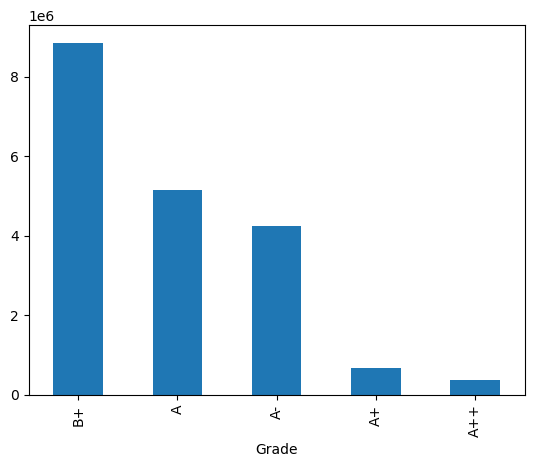

In [127]:
df.groupby("Grade")["Video Uploads"].sum().sort_values(ascending=False).plot(kind="bar")

### 15. Which Grade Has The Highest Average Views?

<Axes: xlabel='Grade'>

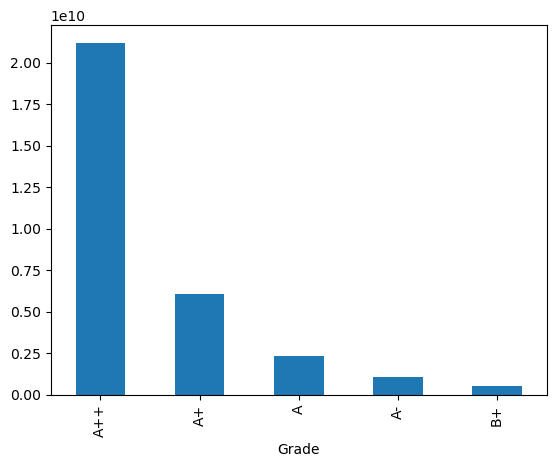

In [125]:
df.groupby("Grade")["Video views"].mean().sort_values(ascending=False).plot(kind="bar")

### 16. Which Grade Has The Highest Number of Subscribers? 

<Axes: xlabel='Grade'>

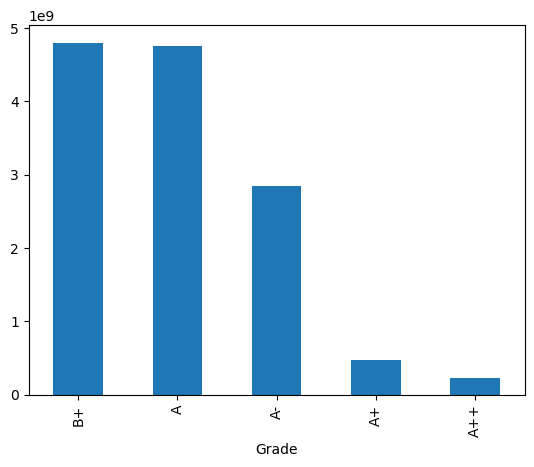

In [124]:
df.groupby("Grade")["Subscribers"].sum().sort_values(ascending=False).plot(kind="bar")

### 17. Which Grade Has The Highest Video Views? 

<Axes: xlabel='Grade'>

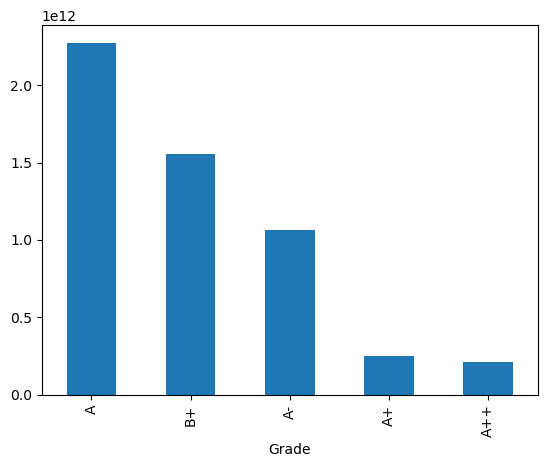

In [122]:
df.groupby("Grade")["Video views"].sum().sort_values(ascending=False).plot(kind="bar")